In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import Cost
import random
import copy

In [2]:
k = 4
numberOfEachGroupPoint = 50

In [3]:
dotMap = []
trueCenter = []
for i in range(k):
    center = []
    center.append(np.random.randint(100))
    center.append(np.random.randint(100))
    dotMap.append(center)
    trueCenter.append(center)
    for j in range(numberOfEachGroupPoint):
        dot = []
        dot.append(center[0] + np.random.normal() * 8)
        dot.append(center[1] + np.random.normal() * 8)
        dotMap.append(dot)
dotMap = np.array(dotMap)

In [4]:
data_X = dotMap[:, 0]
data_Y = dotMap[:, 1]
trueCenter = np.array(trueCenter)

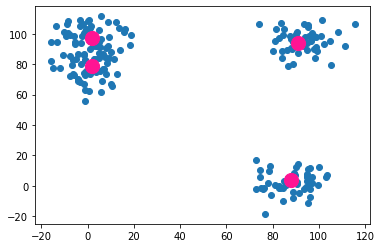

In [5]:
fig = plt.figure()
img = fig.add_subplot(111)
img.scatter(data_X, data_Y)
img.scatter(trueCenter[:,0], trueCenter[:,1], s = 200, c = '#FF1493', marker='o')
plt.show()

In [6]:
k = 4
center = np.zeros([k, 2])
for i in range(k):
    center[i]=(random.choice(dotMap))
group = []
for i in range(k):
    group.append([])

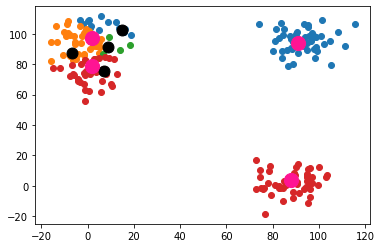

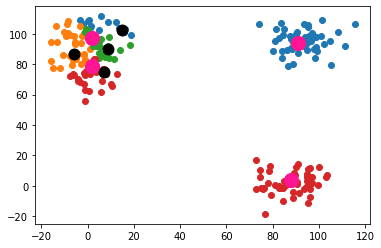

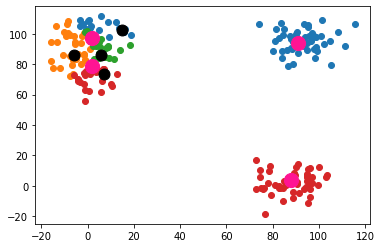

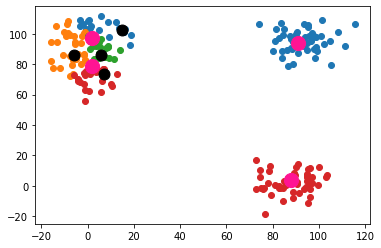

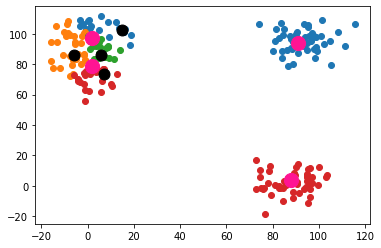

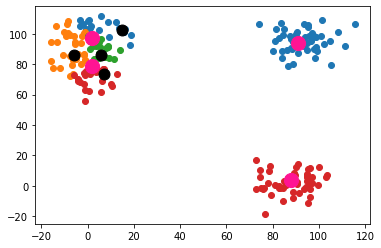

In [7]:
while True:
    beforeCenter = copy.deepcopy(center)
    group = []
    for i in range(k):
        group.append([])
    for index in range(data_X.shape[0]):
        minDistance = 99999999999
        minIndex = -1
        for i in range(k):
            currentDistance = Cost.Euclidean(center[i], dotMap[index])
            if currentDistance < minDistance:
                minDistance = currentDistance
                minIndex = i
        group[minIndex].append(index)
    for i in range(k):
        groupCenter = dotMap[group[i][0]]
        for element in dotMap[group[i]]:
            groupCenter[0] = (element[0] + groupCenter[0]) / 2
            groupCenter[1] = (element[1] + groupCenter[1]) / 2
        center[i] = groupCenter

    fig = plt.figure()
    img = fig.add_subplot(111)
    cm = plt.cm.get_cmap('RdYlBu')
    for i in range(k):
        img.scatter(data_X[group[i]], data_Y[group[i]], cmap=cm)
    img.scatter(center[:, 0], center[:, 1], s=120, c='#000000')
    img.scatter(trueCenter[:,0], trueCenter[:,1], s = 200, c = '#FF1493', marker='o')
    plt.show()
    if (beforeCenter == center).all():
        break

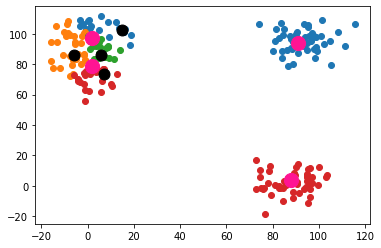

In [8]:
fig = plt.figure()
img = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(k):
    img.scatter(data_X[group[i]], data_Y[group[i]], cmap=cm)
img.scatter(center[:, 0], center[:, 1], s=120, c='#000000')
img.scatter(trueCenter[:,0], trueCenter[:,1], s = 200, c = '#FF1493', marker='o')
plt.show()